In [1]:
%run 'ks38_Read_secondary_structure.ipynb'


Variables: 

- helices:			list of position in alpha-helices
- sheets:			list of position in beta-sheets
- disordered:			all positions that are not in alpha-helices or beta-sheets

- get_secondary_structure:	a function that returns secondary structure of a position



In [8]:
%run 'ks01_Data_import.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)



In [46]:
%run 'ks27_Read_structural_information.ipynb'


Variables: 
- structural_data:		pandas.DataFrame with some structural information,
- get_distance_24mer:		function for getting distances between two positions
				(this also works: get_distance_24mer(13, 'substrate'))
- quantitative_columns_dict:	nice names for some columns in structural_data,
- his3_24mer_file:		path to predicted His3 24mer structure.



In [68]:
close_to_mn = [int(s.split('_')[1]) for s in structural_data[structural_data[['Mn_302','Mn_303','Mn_304']].min(axis=1) < 5].index.values]
close_to_substrate = [int(s.split('_')[1]) for s in structural_data[structural_data['substrate'] < 5].index.values]
print close_to_mn
print close_to_substrate

[64, 90, 91, 92, 94, 121, 125, 130, 159, 187, 190]
[64, 72, 90, 91, 92, 94, 116, 124, 125, 134, 136, 138, 187, 190, 194]


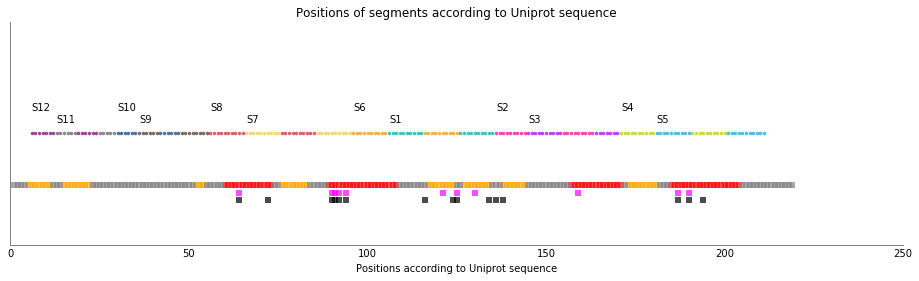

In [72]:
title = 'Positions of segments according to Uniprot sequence'
ax = plot_better(grid='', height=4, width=16)
# plt.tick_params(axis="on", which="both", bottom="off", top="off",  
#     labelbottom="off", left="off", right="off", labelleft="off")
# ax.spines["top"].set_visible(False)  
# ax.spines["right"].set_visible(False) 
# ax.spines["bottom"].set_visible(False)  
# ax.spines["left"].set_visible(False) 

old_y = 2
for row in positions.iterrows():
    for position in row[1].positions_Uniprot_P06633:
        new_y = np.random.choice([1,1.3])
        while new_y == old_y:
            new_y = np.random.choice([1,1.3])
    x = row[1].positions_Uniprot_P06633
    plt.plot(x, [1 for e in x], '.', lw=3, alpha=0.7, label=row[1].segment, color=segment_colors[row[1].segment])
    plt.text(x[0], new_y + 0.3, row[1].segment)
    old_y = new_y

for p in helices:
    plt.plot(p, -0.4, 's', lw=3, alpha=0.7, color='red', markeredgecolor='none')    

for p in sheets:
    plt.plot(p, -0.4, 's', lw=3, alpha=0.7, color='orange', markeredgecolor='none')    

for p in disordered:
    plt.plot(p, -0.4, 's', lw=3, alpha=0.7, color='gray', markeredgecolor='none')    

for p in close_to_mn:
    plt.plot(p, -0.6, 's', lw=3, alpha=0.7, color='magenta', markeredgecolor='none')    

for p in close_to_substrate:
    plt.plot(p, -0.8, 's', lw=3, alpha=0.7, color='black', markeredgecolor='none')    

    
plt.ylim(-2,4)
plt.yticks([])
plt.xlabel('Positions according to Uniprot sequence')
plt.title(title)

plt.savefig('figures/ks47_Secondary_structure_for_Suppl_Figure_1a.png')
plt.savefig('figures/ks47_Secondary_structure_for_Suppl_Figure_1a.pdf')